In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

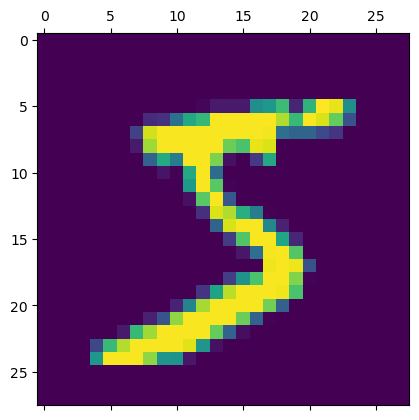

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[3]

1

In [13]:
y_train[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
X_train_flat = X_train.reshape(len(X_train), 28*28)

In [26]:
X_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 501us/step - loss: 0.4683 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 1s 638us/step - loss: 0.3043 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 596us/step - loss: 0.2838 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 507us/step - loss: 0.2735 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 1s 505us/step - loss: 0.2670 - accuracy: 0.9256


In [30]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 433us/step - loss: 0.2696 - accuracy: 0.9243


[0.2696015536785126, 0.9243000149726868]

In [32]:
y_predicted = model.predict(X_test_flat)

313/313 [==============================] - 0s 358us/step


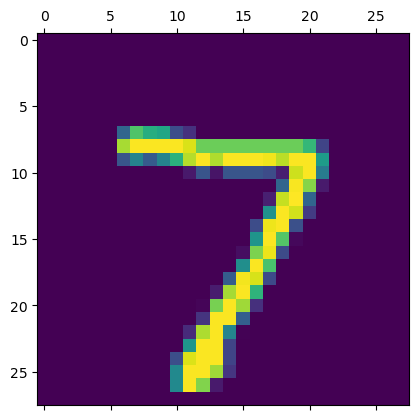

In [34]:
plt.matshow(X_test[0])

In [35]:
y_predicted[0]

array([1.7829699e-02, 4.4397984e-07, 4.9030066e-02, 9.4473171e-01,
       2.7690097e-03, 1.3487360e-01, 1.7421939e-06, 9.9976122e-01,
       1.0957538e-01, 6.2622714e-01], dtype=float32)

In [36]:
np.argmax(y_predicted[0])

7

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [41]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    2,    2,    0,   10,   10,    3,    2,    0],
       [   0, 1106,    3,    2,    1,    1,    4,    2,   16,    0],
       [   5,    9,  927,   13,    7,    7,   12,   11,   39,    2],
       [   3,    0,   20,  902,    1,   42,    2,   11,   23,    6],
       [   1,    1,    4,    1,  932,    0,   10,    3,   11,   19],
       [   7,    3,    3,   15,   11,  807,   13,    4,   25,    4],
       [   7,    3,    5,    0,    7,   17,  913,    2,    4,    0],
       [   1,    5,   21,    7,    9,    1,    0,  949,    5,   30],
       [   4,    7,    7,   19,    9,   41,    9,   10,  862,    6],
       [   9,    7,    1,   10,   45,   10,    0,   22,   11,  894]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

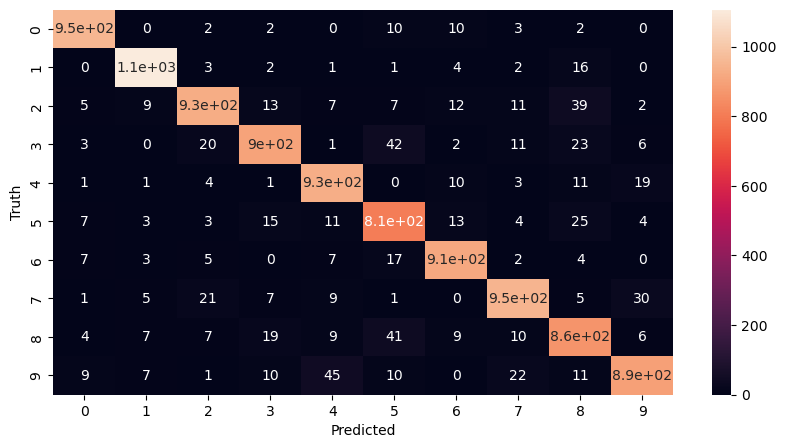

In [43]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') 
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.2801 - accuracy: 0.9198
Epoch 2/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.1276 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 2s 869us/step - loss: 0.0890 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 2s 824us/step - loss: 0.0686 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9836


In [45]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 590us/step - loss: 0.0840 - accuracy: 0.9733


[0.08404545485973358, 0.9732999801635742]

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') 
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)
# we dont want to flatten X_train
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.2746 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.1278 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 859us/step - loss: 0.0668 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.0526 - accuracy: 0.9836
